In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.combine import SMOTEENN

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [4]:
churn = pd.read_csv("D:/Python/churn (1).csv")

In [8]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
churn.shape

(7043, 21)

In [6]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors = 'coerce')

In [10]:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [11]:
churn['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [13]:
churn['Churn'].value_counts()*100/len(churn['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [14]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

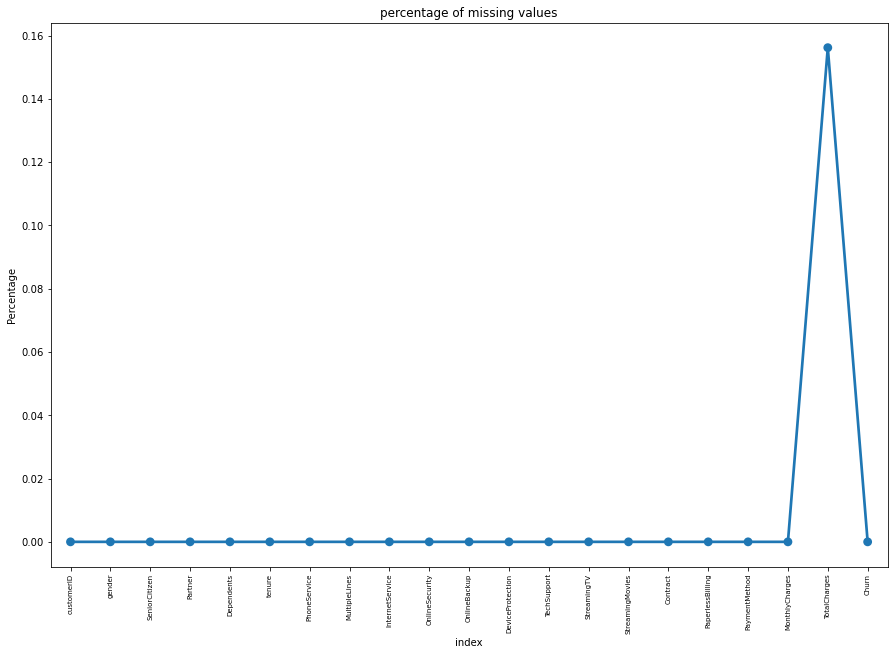

In [15]:
missing = pd.DataFrame((churn.isnull().sum())*100/churn.shape[0]).reset_index()
plt.figure(figsize = (15,10))
ax = sns.pointplot('index', 0, data = missing)
plt.xticks(rotation = 90, fontsize = 7)
plt.title("percentage of missing values")
plt.ylabel("Percentage")
plt.show()

In [6]:
list_cat_cols = list(churn.select_dtypes(include = 'object').columns)
list_num_cols = list(churn.select_dtypes(exclude = 'object').columns)

In [18]:
list_cat_cols

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [19]:
list_num_cols

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [7]:
def fillna(df):
    for i in list_num_cols:
        df[i].fillna(value = df[i].mean(), inplace = True)
    for j in list_num_cols:
        df[j].fillna(value = df[j].mode()[0], inplace = True)
fillna(churn)

In [27]:
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
churn.drop(['customerID'], axis = 1, inplace = True)

In [7]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<AxesSubplot:xlabel='gender', ylabel='count'>

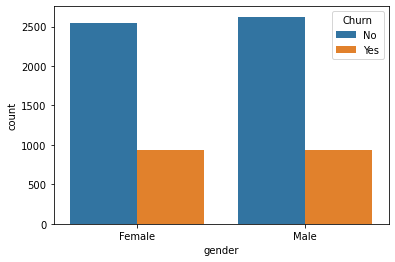

In [36]:
sns.countplot(churn.gender, hue = churn.Churn)

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

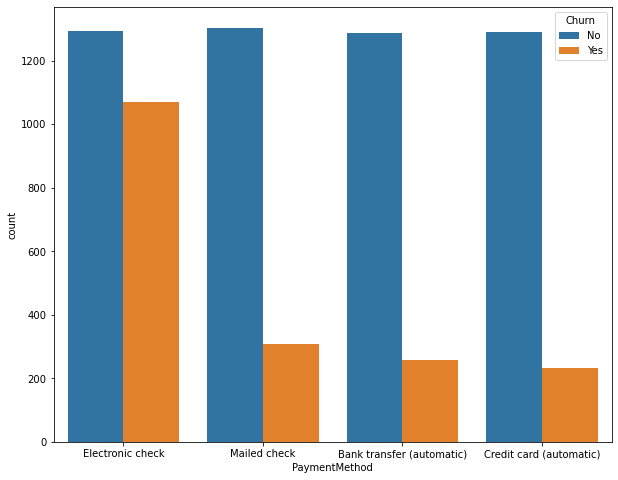

In [38]:
plt.figure(figsize = (10,8))
sns.countplot(churn.PaymentMethod, hue = churn.Churn)

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

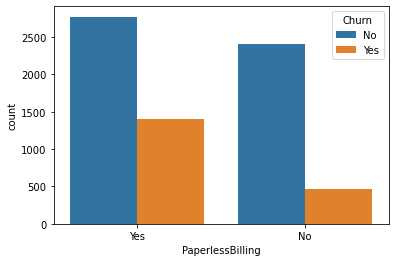

In [41]:
sns.countplot(churn.PaperlessBilling, hue=churn.Churn)

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

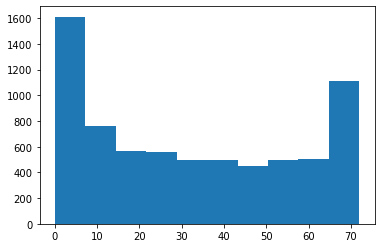

In [43]:
plt.hist(churn.tenure)

(array([2709., 1228.,  682.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

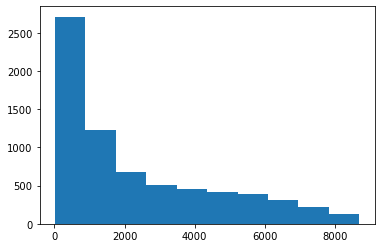

In [44]:
plt.hist(churn.TotalCharges)

(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <BarContainer object of 10 artists>)

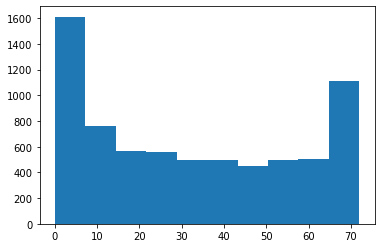

In [45]:
plt.hist(churn.tenure)

<AxesSubplot:xlabel='tenure', ylabel='Density'>

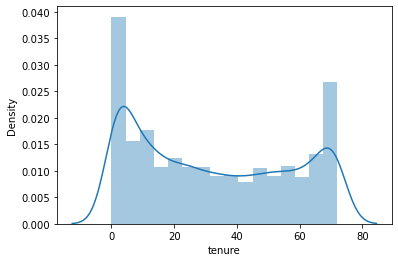

In [46]:
sns.distplot(churn.tenure)

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

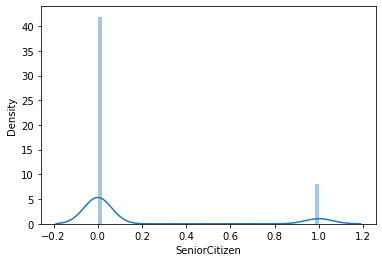

In [47]:
sns.distplot(churn.SeniorCitizen)

<AxesSubplot:xlabel='tenure', ylabel='Density'>

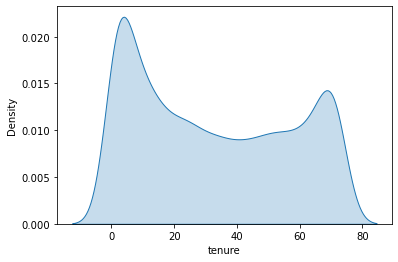

In [51]:
sns.kdeplot(churn.tenure, shade = True)

<AxesSubplot:xlabel='tenure'>

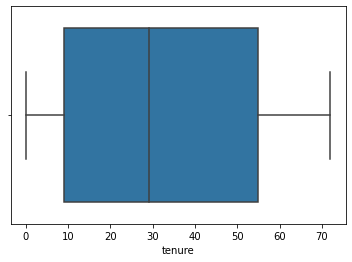

In [53]:
sns.boxplot(churn.tenure)

<AxesSubplot:xlabel='gender', ylabel='tenure'>

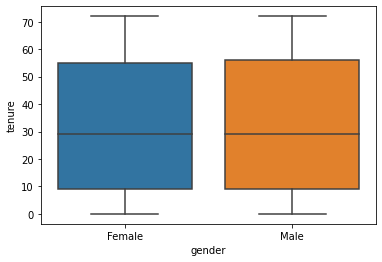

In [10]:
sns.boxplot(x= 'gender', y= 'tenure', data = churn)

<AxesSubplot:xlabel='gender', ylabel='TotalCharges'>

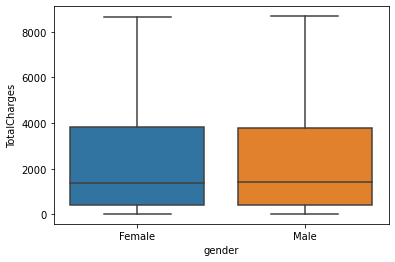

In [11]:
sns.boxplot(x = 'gender', y = 'TotalCharges', data = churn)

In [9]:
churn_numeric = churn.select_dtypes(include = [np.number])
churn_categoric = churn.select_dtypes(exclude = [np.number])

In [8]:
churn_numeric.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [9]:
churn_categoric.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [10]:
churn_dummy = pd.get_dummies(churn_categoric)

In [10]:
churn_dummy.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
4,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1


In [11]:
churn_dummy.drop(['Churn_No'], axis = 1, inplace = True)

In [12]:
churn_dummy.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1
3,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0
4,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1


In [12]:
churn_final = pd.concat([churn_dummy, churn_numeric], axis = 1)

In [14]:
churn_final.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,29.85,29.85
1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,34,56.95,1889.50
2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,2,53.85,108.15
3,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,45,42.30,1840.75
4,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,2,70.70,151.65


In [13]:
#splitting
x = churn_final.drop(['Churn_Yes'], axis=1)
y = churn_final[['Churn_Yes']]

In [24]:
x.head()

,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,29.85,29.85
1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,34,56.95,1889.50
2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,2,53.85,108.15
3,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,45,42.30,1840.75
4,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,2,70.70,151.65


In [25]:
y.head()

,Churn_Yes
0,0
1,0
2,1
3,0
4,1


In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .3, random_state = 100)

### Implementing Logistic Regression

In [15]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

In [16]:
y_pred_lr = model_lr.predict(X_test)

In [17]:
y_pred_lr

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [18]:
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print("Recall: ", recall_score(y_test, y_pred_lr))
print("Precision: ", precision_score(y_test, y_pred_lr))
print("f1 score: ", f1_score(y_test, y_pred_lr))

Accuracy:  0.7898722195929957
Recall:  0.5335689045936396
Precision:  0.6265560165975104
f1 score:  0.5763358778625954


In [19]:
print(confusion_matrix(y_test, y_pred_lr ))

[[1367  180]
 [ 264  302]]


### Logistic Regression with SMOTEENN

In [17]:
sm = SMOTEENN()
x_resample, y_resample = sm.fit_resample(x, y)
xlr_train, xlr_test, ylr_train, ylr_test = train_test_split(x_resample, y_resample, test_size = .3, random_state = 100)
model_lr_smot = LogisticRegression()
model_lr_smot.fit(xlr_train, ylr_train)
y_pred_lr_smot = model_lr_smot.predict(xlr_test)
print("Accuracy: ", accuracy_score(ylr_test, y_pred_lr_smot))
print("Recall: ", recall_score(ylr_test, y_pred_lr_smot))
print("Precision: ", precision_score(ylr_test, y_pred_lr_smot))
print("f1 score: ", f1_score(ylr_test, y_pred_lr_smot))

Accuracy:  0.9364719228587635
Recall:  0.9427359490986215
Precision:  0.938753959873284
f1 score:  0.9407407407407408


In [18]:
print(confusion_matrix(ylr_test, y_pred_lr_smot))

[[762  58]
 [ 54 889]]


In [ ]:
# Generate ROC
plt.subplots(figsize=(10, 5))
train_prob = final_mod.predict_proba(x_train)[:, 1]
test_prob = final_mod.predict_proba(x_test)[:, 1]

plot_roc_curve(y_train, train_prob,
               y_test, test_prob)

### Implementing DT

In [19]:
model_dt = DecisionTreeClassifier(criterion='gini', max_depth=6, min_samples_leaf=8, random_state = 100 )
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [20]:
y_pred_dt = model_dt.predict(X_test)

In [22]:
y_pred_dt

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [21]:
#we can convert the array into a dataframe
df = pd.DataFrame(y_pred_dt)
df.columns = ['Churn']

In [64]:
df.head()

,Churn
0,0
1,0
2,0
3,0
4,0


In [22]:
df.to_csv('self_study_pred', index = False)

In [23]:
print("Accuracy: ", accuracy_score(y_test, y_pred_dt))
print("Recall: ", recall_score(y_test, y_pred_dt))
print("Precision: ", precision_score(y_test, y_pred_dt))
print("f1 score: ", f1_score(y_test, y_pred_dt))

Accuracy:  0.7728348319924279
Recall:  0.5724381625441696
Precision:  0.5765124555160143
f1 score:  0.5744680851063829


In [24]:
print(confusion_matrix(y_test, y_pred_dt))

[[1309  238]
 [ 242  324]]


In [ ]:
# Generate ROC
plt.subplots(figsize=(10, 5))
train_prob = final_mod.predict_proba(x_train)[:, 1]
test_prob = final_mod.predict_proba(x_test)[:, 1]

plot_roc_curve(y_train, train_prob,
               y_test, test_prob)

### SMOTEENN analysis

In [25]:
sm = SMOTEENN()

In [26]:
x_resample, y_resample = sm.fit_resample(x, y)

In [27]:
xr_train, xr_test, yr_train, yr_test = train_test_split(x_resample, y_resample, test_size = .3, random_state = 100)

In [28]:
model_dt_smot = DecisionTreeClassifier(criterion='gini', random_state = 100, max_depth = 6, min_samples_leaf = 8)

In [29]:
model_dt_smot.fit(xr_train, yr_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [30]:
y_pred_dt_smot = model_dt_smot.predict(xr_test)

In [31]:
y_pred_dt_smot

array([1, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [32]:
print("Accuracy: ", accuracy_score(yr_test, y_pred_dt_smot))
print("Recall: ", recall_score(yr_test, y_pred_dt_smot))
print("Precision: ", precision_score(yr_test, y_pred_dt_smot))
print("f1 score: ", f1_score(yr_test, y_pred_dt_smot))

Accuracy:  0.927405740011255
Recall:  0.9490114464099896
Precision:  0.9193548387096774
f1 score:  0.9339477726574501


In [41]:
print(confusion_matrix(yr_test, y_pred_dt_smot))

[[734  78]
 [ 38 904]]


In [ ]:
# Generate ROC
plt.subplots(figsize=(10, 5))
train_prob = final_mod.predict_proba(x_train)[:, 1]
test_prob = final_mod.predict_proba(x_test)[:, 1]

plot_roc_curve(y_train, train_prob,
               y_test, test_prob)

### Random Forest Classifier

In [33]:
model_rf = RandomForestClassifier(criterion='gini', max_depth=6, min_samples_split=2, min_samples_leaf=8)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8)

In [34]:
y_pred_rf = model_rf.predict(X_test)

In [35]:
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print("Recall: ", recall_score(y_test, y_pred_rf))
print("Precision: ", precision_score(y_test, y_pred_rf))
print("f1 score: ", f1_score(y_test, y_pred_rf))

Accuracy:  0.7889256980596309
Recall:  0.4823321554770318
Precision:  0.6408450704225352
f1 score:  0.5504032258064515


In [ ]:
# Generate ROC
plt.subplots(figsize=(10, 5))
train_prob = final_mod.predict_proba(x_train)[:, 1]
test_prob = final_mod.predict_proba(x_test)[:, 1]

plot_roc_curve(y_train, train_prob,
               y_test, test_prob)

### SMOTEEN Analysis

In [36]:
x_resample_rf, y_resample_rf = sm.fit_resample(x, y)

In [37]:
xrf_train, xrf_test, yrf_train, yrf_test = train_test_split(x_resample_rf, y_resample_rf, test_size = .3, random_state = 100)

In [38]:
model_rf_smot = RandomForestClassifier(criterion='gini', max_depth=6, min_samples_split=2, min_samples_leaf=8)

In [39]:
model_rf_smot.fit(xrf_train, yrf_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8)

In [40]:
yrf_pred_smot = model_rf_smot.predict(xrf_test)
yrf_pred_smot

array([1, 0, 1, ..., 1, 1, 1], dtype=uint8)

In [41]:
print("Accuracy: ", accuracy_score(yrf_test, yrf_pred_smot))
print("Recall: ", recall_score(yrf_test, yrf_pred_smot))
print("Precision: ", precision_score(yrf_test, yrf_pred_smot))
print("f1 score: ", f1_score(yrf_test, yrf_pred_smot))

Accuracy:  0.9296171171171171
Recall:  0.9519832985386222
Precision:  0.9202825428859738
f1 score:  0.9358645459209851


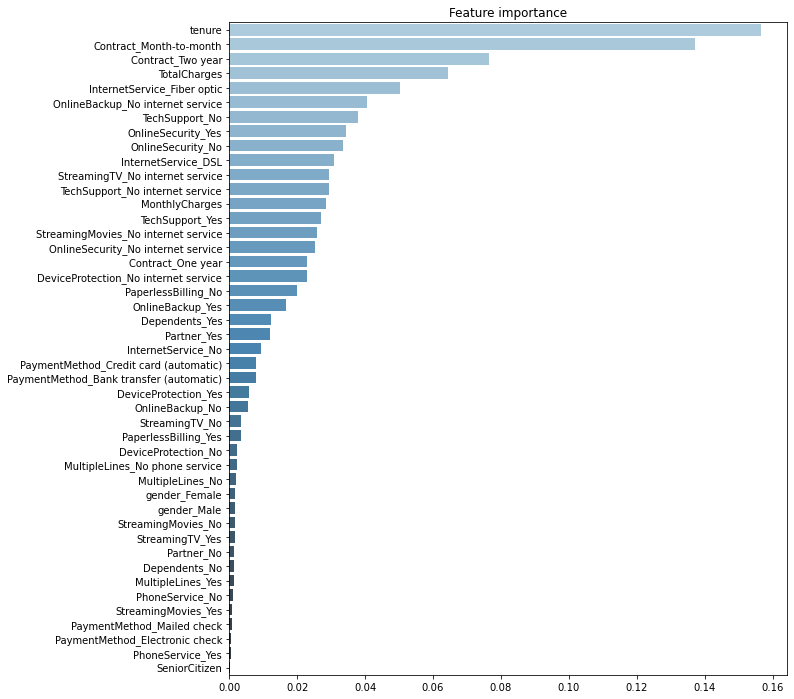

In [42]:
#Plot features importances
feature_imp = pd.Series(data=model_rf_smot.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=feature_imp.index, x=feature_imp.values, palette="Blues_d", orient='h')

In [ ]:
# Generate ROC
plt.subplots(figsize=(10, 5))
train_prob = final_mod.predict_proba(x_train)[:, 1]
test_prob = final_mod.predict_proba(x_test)[:, 1]

plot_roc_curve(y_train, train_prob,
               y_test, test_prob)

### Support Vector Machine Classifier

In [45]:
model_svm = SVC(kernel = 'linear')

In [46]:
model_svm.fit(X_train, y_train)

SVC(kernel='linear')

In [47]:
pred_svm = model_svm.predict(X_test)

In [48]:
pred_svm

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [51]:
print("Accuracy: ", accuracy_score(y_test,pred_svm ))
print("Precision: ", precision_score(y_test,pred_svm ))
print("Recall: ", recall_score(y_test,pred_svm ))
print("F1 score: ", f1_score(y_test,pred_svm ))

Accuracy:  0.7851396119261713
Precision:  0.6465968586387435
Recall:  0.4363957597173145
F1 score:  0.5210970464135022


In [ ]:
# Generate ROC
plt.subplots(figsize=(10, 5))
train_prob = final_mod.predict_proba(x_train)[:, 1]
test_prob = final_mod.predict_proba(x_test)[:, 1]

plot_roc_curve(y_train, train_prob,
               y_test, test_prob)

### SVC with SMOTEENN

In [57]:
x_resample_svc, y_resample_svc = sm.fit_resample(x, y)
xsvc_train, xsvc_test, ysvc_train, ysvc_test = train_test_split(x_resample_svc, y_resample_svc, test_size = .3, random_state = 100)

In [61]:
model_svc_smot = SVC(kernel = 'linear')
model_svc_smot.fit(xsvc_train, ysvc_train)

SVC(kernel='linear')

In [64]:
y_svc_r = model_svc_smot.predict(xsvc_test)
y_svc_r

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [65]:
print("Accuracy: ", accuracy_score(ysvc_test,y_svc_r ))
print("Precision: ", precision_score(ysvc_test,y_svc_r ))
print("Recall: ", recall_score(ysvc_test,y_svc_r ))
print("F1 score: ", f1_score(ysvc_test,y_svc_r ))

Accuracy:  0.9492753623188406
Precision:  0.9661375661375662
Recall:  0.9393004115226338
F1 score:  0.952529994783516


In [67]:
print(classification_report(ysvc_test, y_svc_r ))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95       822
           1       0.97      0.94      0.95       972

    accuracy                           0.95      1794
   macro avg       0.95      0.95      0.95      1794
weighted avg       0.95      0.95      0.95      1794



In [ ]:
# Generate ROC
plt.subplots(figsize=(10, 5))
train_prob = final_mod.predict_proba(x_train)[:, 1]
test_prob = final_mod.predict_proba(x_test)[:, 1]

plot_roc_curve(y_train, train_prob,
               y_test, test_prob)

### SVC with hyper parameter tuning

In [68]:
#Define Model parameters to tune
model_params = {
    'kernel':['rbf, polynomial', 'linear'],
    'C':[1,10,100,100],
    'class_weight':['balanced', None],
    'gamma':[0.0001,0.001]
}

In [71]:
model = SVC(probability = True)

gscv = GridSearchCV(estimator=model, 
                    param_grid=model_params, 
                    cv=2, 
                    verbose=1, 
                    n_jobs=-1,
                    scoring='f1')

In [ ]:
gscv.fit(xsvc_train, ysvc_train)

Fitting 2 folds for each of 32 candidates, totalling 64 fits


### Saving a final model

In [57]:
import pickle

In [58]:
filename = 'churn_model2'
pickle.dump(model_rf_smot, open(filename, 'wb'))

### Loading a saved model

In [60]:
load_model = pickle.load(open(filename, 'rb'))
load_model.score(xrf_test, yrf_test)

0.934135166093929